## Autograd from scratch

This notebook covers the walkthrough provided on
[AutoGrad](https://github.com/karpathy/micrograd) 
on Anndrej Karpathy's youtube tutorial 

[The spelled-out intro to neural networks and 
backpropagation: building micrograd
](https://www.youtube.com/watch?v=VMj-3S1tku0&list=PPSV)

### Introduction

#### The functionality of micrograd
The functiuonality is best illustrated by an example which can be found in the example usage section in the github readme

It illustrates how to build out an expression, which micrograd will build out in the background

It then allows us to not only look at the forward pass but also perform backpropagation on the expression graph

#### Why this tutorial?
The reason for this tutorial is to understand the expression graphs behind a neural network and how
backpropagation, which is the fundamental
underpinning of neural networks, is really just 
calculating the derivative of each node in your 
expression with respect to the output nodes, and that
through using the **chain rule** from calculus, we can
calculate all these derivatives (or gradients) of each
node with respect to the output layer. 

Neural networks are just mathematical expressions, which take input data and weights as an input and 
the output are your predictions or a loss function

#### Neural networks are just a certain class of mathematical expression
Backpropagation doesn't care about neural networks, it is more general of a concept than one that can only be applied to neural networks

It only cares about arbitary mathematical expressions

Then we happen to use that to use that machinery for
the training of neural networks

#### Micrograd is a scalar valued autograd engine
As Andrej explains, Micrograd is excessive 
in the detail it illustrates, because it is working on the level of individual scalars

We are taking neural networks and breaking them down to all the way to these atoms of individual scalars, ultimatley this is just done for petagogical reasons
because it allows us to not have to deal with
n-dimensional tensors that you would use in a modern deep-neural-network library

This is really done so that we understand
and refactor out backpropagation, chain rule and
understanding of neural network training

#### When training bigger networks we use tensors
This is only really done for efficiency

Tensors are just arrays of scalar values like micrograd uses

We take scalar values, package them up into tensors,
which are just arrays of these scalars, and then
we do operations on these large arrays, it allows us 
to take advantage of parallezim in computer

Because of this, micrograd was written to help us
understand how neural netowrks work at the fundamental
level, then we can speed it up later


In [3]:
import math
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def f(x):
  return 3*x**2 - 4*x + 5

In [5]:
f(3.0)
# 3 * 9 - 4 * 3 + 5
# 27 - 12 + 5
# 20

20.0

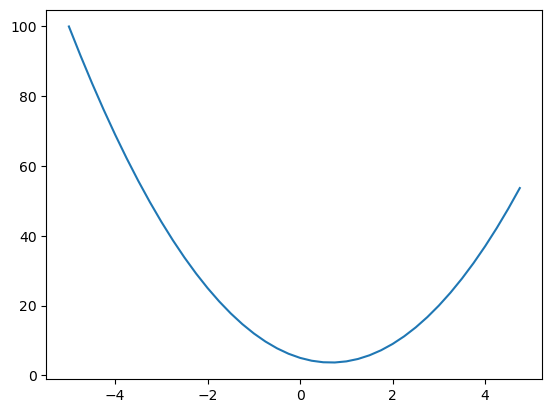

In [6]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
ys
plt.plot(xs, ys)


Quick reminder on derivates

https://en.wikipedia.org/wiki/Derivative#Definition


If the function f is differentiable at a, that is if the limit L exists,<br> then this limit is called the derivative of f at a, and denoted <br>
$ f'a $ f'(a) <sub>(read as "f prime of a")</sub> or 
${\textstyle {\frac {df}{dx}}(a)} $
<sub>(read as "the derivative of f with respect to </sub><br>
<sub> x at a", "dy by dx at a", or "dy over dx at a") </sub> <br>

In the following example, as h tends towards 0, we converge on the value for the derivative

When calculating a derivative we are the rate of change of a function with respect to a variable

In [7]:

def derive (point, increase):
  return (f(point + increase) - f([point])) / increase


In [8]:
h = 0.0001
x = 3


# By 

# f(x + h) - f(x) gives us the increaes of the change with respect to h 
# (how much the function responded)
def derive (point, increase):
  derived = (f(point + increase) - f(point)) / increase
  # print(derived)
  return derived

# we must nnormalise by the run from (rise over run) of the slope, h, to get our value 

derive(x, h)

# this is just a numerical representation of the slope as h has to be very small to convnerge
# on the exact amount so we have to

14.000300000063248

In [9]:
# if we do too many zeros, say h = 0.00000000000001
h = 0.00000000000001
derive(x, h)

14.210854715202004

In [10]:
# this iis because we are using floating point arithmitc and the representations of these 
# numbers is finite so at certain precisions we run into trouble
print(f"Rounded value {round(derive(2/3, 0.0000001))}")

# at the precise point 2/3 the slope is 0

Rounded value 0


In [11]:
# For point where x = -3, we can see we would have a negative slope
print(derive(-3, h))

-22.737367544323206


In [12]:
# lets get more complex
a = 2.0
b = -3
c = 10
# now  we have a function that is a function of 3 scalar inputs
# a, b & c
# 3 inputs into our expression graph (a,b & c)
# and a single output d
d = a*b+c
d

4.0

In [13]:
h = 0.00001

#inputs 
# a, b & c are 3 values in our expression 
# graph with one output d
a = 2.0
b = -3.0
c = 10

# We want to look at the derivatives with respect
# to a,b & c and think through the inituition of 
# what this derivative is telling us

d1 = a*b + c
a += h
d2 = a*b +c

# d2 - d1 is how much the function increased
# normalised by h to get the slope
print('d1', d1)
print('d2', d2)
print ('slope', (d2 - d1)/h)

d1 4.0
d2 3.9999699999999994
slope -3.000000000064062


Here we went from 4 (d1) to 3.9996 (d2)
which shows us that the sloope will be
a negative number because we went down

Next lets look at bumping b by a tiny amount in a positive direction and seeing it how that affects the slope

So if we change b we will get a different slope

So here we are looking at if we change b, what is the affect and sensitivity of that change on the output d

In [14]:
d1 = a*b + c
b += h
d2 = a*b +c

print("For changing b we get the following result")
print("This shows us the sensitivity of the output function d with respect to b")
# d2 - d1 is how much the function increased
# normalised by h to get the slope
print('d1', d1)
print('d2', d2)
print ('slope', (d2 - d1)/h)

For changing b we get the following result
This shows us the sensitivity of the output function d with respect to b
d1 3.9999699999999994
d2 3.9999900000999995
slope 2.00001000001393


Why is it 2?

D of d / db (differentating with respect to b) 

Would give us the value of a


In [15]:
d1 = a*b + c
c += h
d2 = a*b +c

print("For changing c we get the following result")
print("This shows us the sensitivity of the output function d with respect to c")
# d2 - d1 is how much the function increased
# normalised by h to get the slope
print('d1', d1)
print('d2', d2)
print ('slope', (d2 - d1)/h)

For changing c we get the following result
This shows us the sensitivity of the output function d with respect to c
d1 3.9999900000999995
d2 4.000000000099999
slope 0.9999999999621422


If c gets bumped a tiny amount by h, then a*b is unaffected, and c is slightly higher
Thus it makes d a little bit higher because we are just adding c

And because we just add it, the affect of that change has a slope of 1, because we are just adding c



## Understanding Micrograd's `Value` Object

We now have an intuitive sense of what this derivative is telling us about the function

Okay...so how do we apply this to a neural network?

Typically, Neural networks will be massive expression
Hence we need data structures that are going to contain those expressions

So we will now move on to understanding the value object that is in the readme of the autograd example 

In [16]:
# class value takes a simple scalar value
# that it wraps and keeps track of

class Value:
  def __init__(self, data) -> None:
    self.data = data

  def __repr__(self) -> str:
    return f"Value(data={self.data})"


a = Value(2.0)
b = Value(-3.0)

a,b 

(Value(data=2.0), Value(data=-3.0))

So we start with this simple definition that wraps the value

Now what we'd like to do is perform addition on these values, however this won't currently work as Value isn't aware of addition operations

To define the operator we have to use these special double undescore methods, to define these operators for the objects



In [17]:
# class value takes a simple scalar value
# that it wraps and keeps track of

class Value:
  def __init__(self, data) -> None:
    self.data = data

  # this provides us a way to print out
  # a less confusion output in python
  # rather than something with a pointer 
  # label in the output
  def __repr__(self) -> str:
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data)
    return out
    
  def __mul__(self, other):
    out = Value(self.data * other.data)
    return out


a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a*b + c


Next, now we can create our expression `d = a*b + c` 

Now what we are missing is the connective tissue of this expression

We want to keep these expression graphs
so we need to know and keep pointers about what values, create what other values

In [18]:
class Value:
  # 1. 
  # here we introduce a new variable children
  # which is an empty tuple by default
  def __init__(self, data, _children=(), _op='') -> None:
    self.data = data
    # 2. 
    # we maintain it in the class as a set
    self._prev = set(_children)
    # 4. We store op so we know what the 
    # operation was for that part of the
    # expression
    self._op = _op

  def __repr__(self) -> str:
    return f"Value(data={self.data})"

  # 3.
  # now when we create the values for 
  # adddition or multiplication we will feed
  # in the children of this value
  def __add__(self, other) -> str:
    out = Value(self.data + other.data, (self, other), "+")
    return out

  def __mul__(self, other) -> str:
    out = Value(self.data * other.data, (self, other), "*")
    return out

a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a*b + c
d._prev, d._op

({Value(data=-6.0), Value(data=10.0)}, '+')

Now we have ._prev & ._op

Now we have the full mathematical expression
and we know exactly how each data value came to be, by what expression and from what other values.

Because these expressions are about to get quite a bit larger we are going to need something to visualize these expression graphs for us

this creates a new function `draw_dot(expression)``



In [19]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in the graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges


def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})  # LR = Left to Right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid, label="{ data %.4f }" % (n.data,), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid + n._op, label=n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

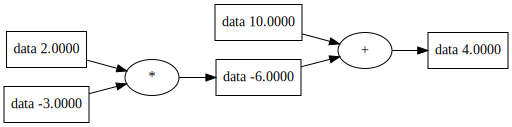

In [20]:
draw_dot(d)

Here the only value objects are the square items, the operation nodes are just derived from the `draw_dot` method


Now we will add labels to our `Value` class

In [21]:
class Value:

  # 5. Now we will add label
  def __init__(self, data, _children=(), _op='', label='') -> None:
    self.data = data
    self.grad = 0.0
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self) -> str:
    return f"Value(data={self.data})"

  def __add__(self, other) -> str:
    out = Value(self.data + other.data, (self, other), "+")
    return out

  def __mul__(self, other) -> str:
    out = Value(self.data * other.data, (self, other), "*")
    return out


a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e';
d = e + c; d.label = 'd';
d._prev, d._op


({Value(data=-6.0), Value(data=10.0)}, '+')

Now we can print this label by updating our `draw_dot` method

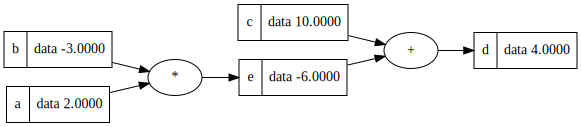

In [22]:
def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})  # LR = Left to Right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid, label="{ %s | data %.4f }" % (n.label, n.data,), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid + n._op, label=n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

draw_dot(d)


In [23]:
f = Value(-2.0, label='f')
L = d * f;
L; L.label="L"

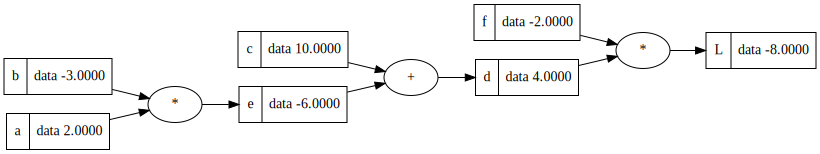

In [24]:
draw_dot(L)

Recap of where we are:
- We are able to build a mathematical expression (currently only comprised of add and multiply) which are Scalar valued
- Build out a 'forward pass', that gives us the output L
- We can visualise the forward pass


Using our example, the output of our forward pass, gives the value `-8.0`

## On to Backpropagation

For backpropagation, we will start at the end and reverse - calculate the gradient along all these intermediate values

Really what we are calculating is, for every single value, we will calculate the derivatve of L with respect to that value

In neural network setting, we are interested in the derivative of this loss function L, with respect to the weights of a neural network. Our values a,b,c,d,e & f are acting in the same way that our weights of a neural net.

Next we will create a value inside the value class. 

Note: I have modified above class definition as redefining here didn't work

@todo find out why

In [25]:
def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})  # LR = Left to Right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid, label="{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid + n._op, label=n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot
    

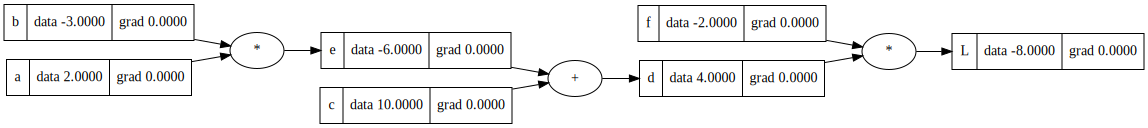

In [26]:

# same expression as before just here for clarity
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d*f; L.label="L"

draw_dot(L)

In [27]:
# We are creating a gating function to limit the 
# scope of these variables, so we don't pollute
# the global scope

def estimate_gradient_of_L(): # with respect to L
    h = 0.0000001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b
    e.label = 'e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f
    L.label = "L"
    # need to get the float value wrapped 
    # in our value object so we use the `data` prop
    L1 = L.data  

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b
    e.label = 'e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f
    L.label = "L"
    L2 = L.data + h

    print((L2 - L1) / h)


estimate_gradient_of_L()


1.0000000028043132


### Deriving a node
So if we change L by h we get 1.
This is like the base case of what we are doing here.
This is because the derivative of L with respect to L is going to be 1.

Since above in `estimate_gradient_of_L()` we are using numerical estimation of our gradient, we use a small value of h to calculate that gradient and we can see it tends towards 1

So given this we will set the gradient of L in our graph to 1.

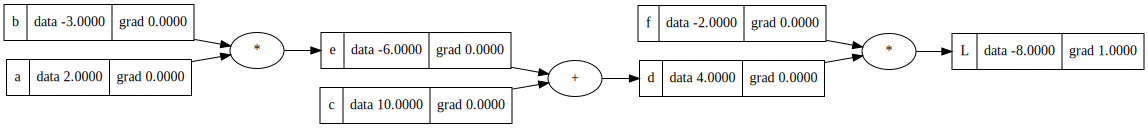

In [28]:
L.grad = 1;
draw_dot(L)

We are now going to continue deriving the values through the graph (continue the backpropagation)

Lets first look at the derivatives of $L$ with respect to $d$ and $f$

Firstly $d$

We know that $ L = d\times f $
... so the derivative of $L$ with respect to $d$ is expressed as
$\frac{dL}{dd}$

We can use calculus to tell us that if $ L = d\times f $ then $\frac{dL}{dd}$ is $f$

The proof of this is straightforward

##### Proof
Definition of a derivative 

$${\displaystyle L=\lim _{h\to 0}{\frac {f(x+h)-f(x)}{h}}}$$

Increasing $d$ by $h$ gives us the output of 

$$\frac{(d+h)\times f - d\times f}{h}$$

...in this example, our $x$ is $d$

then, expanding out symbolically

$$\frac{d\times f + h\times f - d\times f}{h}$$ 

the $d\times f$'s cancel, giving us 

$$\frac{h \times f}{h}$$

which just leaves us with 

$$f$$


Given this, lets looks at what the derivative of $d$ is


In [29]:
def estimate_the_gradient_of_d():
    h = 0.001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b
    e.label = 'e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f
    L.label = "L"
    L1 = L.data  # need to get the float value wrapped in our value object

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b
    e.label = 'e'
    d = e + c
    # we want derivative with respect to d
    # so lets add in h here
    d.data += h
    d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f
    L.label = "L"
    L2 = L.data

    print((L2 - L1) / h)


estimate_the_gradient_of_d()


-2.000000000000668


Here we see we get the value of 4. Or close enough due to our floating point funkiness

Now lets do the same, changing $d$, to get the gradient for f

What we are doing is somewhat an **inline gradient check**

This is when we are deriving backpropagation and getting the derivative with respecect to all the intermediate results

**Numerical gradient** is estimating that derivative by using a small input size

In [30]:
def estimate_gradient_of_f():
    h = 0.001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b
    e.label = 'e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f
    L.label = "L"
    L1 = L.data 

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b
    e.label = 'e'
    d = e + c
    d.label = 'd'
    # this time we want 
    # derivative with respect 
    # to f so lets add in h here
    f = Value(-2.0 + h, label='f')
    L = d*f
    L.label = "L"
    L2 = L.data

    print((L2 - L1) / h)


estimate_gradient_of_f()


3.9999999999995595


Here we have numerically verified the gradients
for both $d$ & $f$ as -2 and 4 respectively

Lets print that out on the graph

Notice `f.grad` is the value of d and `d.grad` is the value of $f$

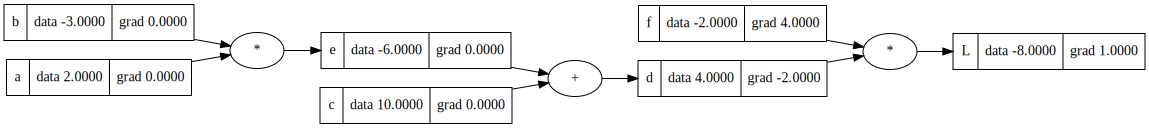

In [31]:
f.grad = 4.0
d.grad = -2.0
draw_dot(L)

Next we will continue the backpropagation manually for values c & e

so we want to find out $\frac{dl}{dc}$
and also $\frac{dl}{de}$

#### First a problem....
How do we derive $\frac{dl}{dc}$ ? 

We know derivative $l$ with respect to $d$
so we know how $l$ is sensitive to $d$
but how is $l$ sensitive $c$

i.e. if we change $c$, how does that affect $l$ through $d$

So intuitively... if we know the impact
$c$ is having on $d$, and $d$ is having
on $l$, then we should be able to put
those together to find out the impact
that $c$ has on $l$.

i.e. 
knowing 
$\frac{dl}{dd}$ and
$\frac{dd}{dc}$
then we should be able to work out
$\frac{dl}{dc}$

#### The derivative of d with respect to c

what is $\frac{dd}{dc}$ ? when $d = c + e$

From calculus we can quickly deduce that
differentiating c + e with respect to c will give us 1.0

##### Proof through deriving

Again, the definition of a 
$\frac{f(x + h)-f(x)}{h}$
as a limit of h goes to 0

Focusing on c and it's affect on d 

$\frac{(c+h) + e - (c + e)}{h}$

expanding out 

$\frac{c + h + e - c - e}{h}$ the $c$'s and $e$'s cancel which leaves us with

$\frac{h}{h}$

which is 1.0

And so by symettry we can also work out that $\frac{dd}{de}$ 
is also 1

So basically the derivative of a sum expression is very simple...

so<br><br>
$\frac{dd}{de}  = 1$<br><br>
$\frac{dd}{de} = 1$ 

This is the local derivative. We call this the local derivative because we are looking at one node. that node doesn't know anything about the rest of the graph that it is embedded in 

What we actually want is $\frac{dl}{dc}$ so how do we take these two and put them together

The way we achieve this is through using the **chain rule** in calculus

### The chain rule
$${\displaystyle {\frac {dz}{dx}}={\frac {dz}{dy}}\cdot {\frac {dy}{dx}}}$$

###### Useful intuitive explanation from [Wikipedia](https://en.wikipedia.org/wiki/Chain_rule)
Intuitively, the chain rule states that knowing the instantaneous rate of change of z relative to y and that of y relative to x allows one to calculate the instantaneous rate of change of z relative to x as the product of the two rates of change.

As put by George F. Simmons: "if a car travels twice as fast as a bicycle and the bicycle is four times as fast as a walking man, then the car travels 2 × 4 = 8 times as fast as the man."[1]

##### Using chain rule to get 

Knowning this we can now work out $\frac{dl}{dc}$

$${\displaystyle {\frac {dl}{dc}}={\frac {dl}{dd}}\cdot {\frac {dd}{dc}}}$$

And because $\frac{dd}{dc}$ are just 1, we basically just copy over  $\frac{dl}{dd}$

So in essence, what a plus node does, is just route the gradient of the previous node (from the perspective of backpropagation)

**So $c$ & $e$ gradients will just be the gradient of $d$**

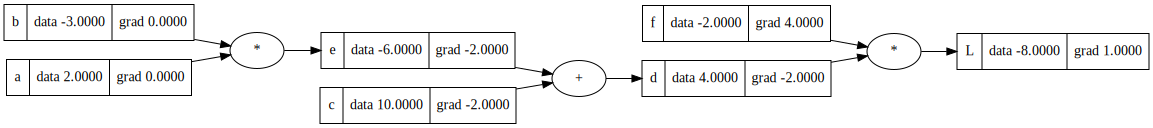

In [32]:
# so
c.grad = -2.0
# and by symmetry e will also be -2
e.grad = -2.0
draw_dot(L)

In [33]:
# We will attempt to verify the claim that d routes to c & e
def estimate_gradient_of_c():
    h = 0.001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b
    e.label = 'e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f
    L.label = "L"
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    # Increment c by h to estimate value
    c.data += h
    e = a*b
    e.label = 'e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f
    L.label = "L"
    L2 = L.data

    print((L2 - L1) / h)


estimate_gradient_of_c()


-1.9999999999988916


Here we can see that when we estimate this it prints out -2 as expected

Now we are going to recurse our way backwards, again applying the chain rule

We will continue this by applying it back across the whole graph... thus completing the backpropagation

#### The derivative of $L$ with respect to $a$

what is $\frac{de}{da}$ ? when $e = a \times b$

we know 

$${\displaystyle {\frac {dL}{da}}={\frac {dL}{de}}\cdot {\frac {de}{da}}}$$

Since we already derived a multiplaction earlier we won't re-derive this but we can say that if we want to differentiate 
$e = a \times b$ with respect to $a$ then the value is $b$

$$\frac{de}{da} = b$$

We also know that $\frac{dL}{de}$ (the gradient of node $e$) is 
$$\frac{dL}{de} = -2.0$$
from the previous step

So 
$${\displaystyle {\frac {dL}{da}}= -2 \cdot b}$$

So if $b = -3$, then

$${\displaystyle {\frac {dL}{da}}= -2 \times -3}$$

which means

$${\displaystyle {\frac {dL}{da}}= 6 }$$



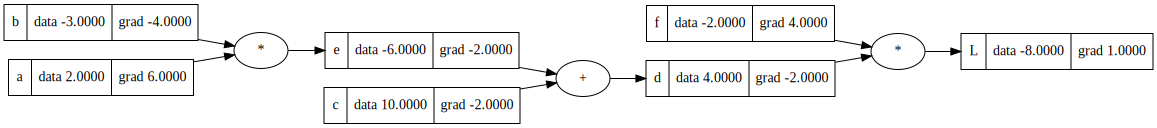

In [34]:
a.grad = -2.0 * -3.0
# we can do the same as explained above 
# for b - we just take the value of a instead 
# of the value of b as it will be symetrical
b.grad = -2.0 * 2.0
draw_dot(L)

one last time we will estimate this value numerically


In [35]:
# We will attempt to verify the claim that d routes to c & e
def estimate_gradient_of_a():
    h = 0.001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b
    e.label = 'e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f
    L.label = "L"
    L1 = L.data

    a = Value(2.0, label='a')
    a.data += h
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b
    e.label = 'e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f
    L.label = "L"
    L2 = L.data

    print((L2 - L1) / h)


def estimate_gradient_of_b():
    h = 0.001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b
    e.label = 'e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f
    L.label = "L"
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    b.data += h
    c = Value(10.0, label='c')
    e = a*b
    e.label = 'e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f
    L.label = "L"
    L2 = L.data

    print((L2 - L1) / h)


estimate_gradient_of_a()
estimate_gradient_of_b()


6.000000000000227
-3.9999999999995595


Now we have completed the manual backpropagation, from L to all the leaf nodes

All we did was iterate through each of the nodes, and locally applied the chain rule

So we now understand that 

**Backpropagation is a recursive application of chain rule, backwards through the computation graph**

## Backpropagation useful example

Below we have a simple mathematical model of a neuron

Synapses have weights on them

The $w$'s are *weights*

The synapse interacts with the input to this neuron multiplicatively

There are multiple inputs so there are many $w \times x$'s flowing into the cell body (hence the sub notation)

What flows to the cell body of the neuron is $w_0x_0$

The cell body then has a *bias*, this is how 'trigger happy' it is

Basically we are taking all the $w \times x$'s, adding the
bias, and then putting it through an *activation function*,
which is usually some kind of squashing function, such as
`sigmoid` or `tanh` function

Finally, what comes out of the nueron, is the activation function applied to the dot product of the weights and the inputs

![cs231n neuron](https://cs231n.github.io/assets/nn1/neuron_model.jpeg "How we model a neuron mathematically")

### An example of an activation function

Numpy has `np.tanh()` which we can plot

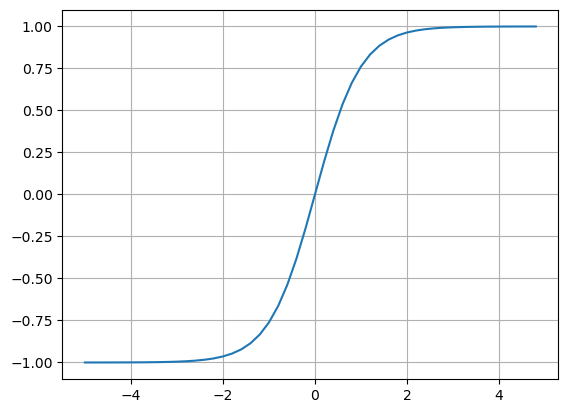

In [36]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); 
plt.grid();

As you go more postive in your input the function will only go
up to 1, this is the squashing effect

Large values, and small values can be squashed into something that has a specific range that aims to maintain the value relative to the new range

Said otherwise, if you pass in very positive inputs you will cap it smoothly, to 1. We also do the same on the negative side for very large numbers to cap it smoothly to -1

Lets write one out as an example

In [37]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the nueron
b = Value(6.7, label='b')

# now according to the model above
# we need to multiply, x1 with w1
# and x2 with w2
x1w1 = x1*w1
x1w1.label = 'x1*w1'
x2w2 = x2*w2
x2w2.label = 'x2*w2'

# we do this in small steps so we
# can maintain pointers to each
# in this example
x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1*w1 + x2*w2'

# Finally we need to add the bias
# on top of that
n = x1w1x2w2 + b
n.label = 'n'


At this point, n now represents
the cell body, without the activation function

Lets plot the graph


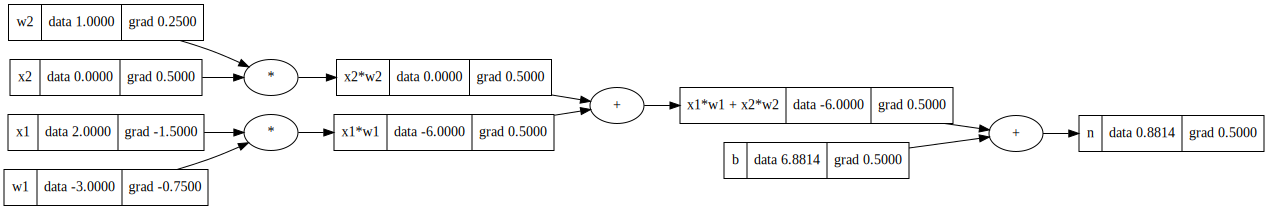

In [54]:
draw_dot(n)

Now we will pass it through `tanh`

We will take n and get an output by putting it through tanh

However we need to implement another tanh function here because we've only so far implemented plus and times

We also need exponentiation and dividing

However... instead of implementing the atomic pieces of 
code we would need to create
a tanh function, we can instead
choose an arbitary point of abstraction
in this case then, we will just directly
implement the `tanh` function into
our `Value` class, since all we need in this example is the output
value of tanh


In [39]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self) -> str:
        return f"Value(data={self.data})"

    def __add__(self, other) -> str:
        out = Value(self.data + other.data, (self, other), "+")
        return out

    def __mul__(self, other) -> str:
        out = Value(self.data * other.data, (self, other), "*")
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        # wrap the value in a tuple, and call the function tanh
        out = Value(t, (self,), 'tanh')
        return out

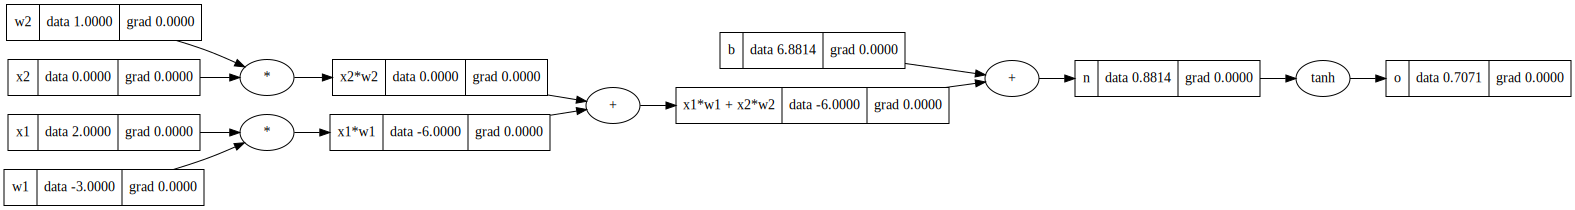

In [40]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the nueron
b = Value(6.8813735870195432, label='b')

# now according to the model above
# we need to multiply, x1 with w1
# and x2 with w2
x1w1 = x1*w1
x1w1.label = 'x1*w1'
x2w2 = x2*w2
x2w2.label = 'x2*w2'

# we do this in small steps so we
# can maintain pointers to each
# in this example
x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1*w1 + x2*w2'

# Finally we need to add the bias
# on top of that
n = x1w1x2w2 + b
n.label = 'n'

# now we can add our tanh
o = n.tanh()
o.label='o'
draw_dot(o)


Now with this we will do backpropagation, to fill in all these gradients

What is the derivative $o$, with respect to all the inputs here

In a typical neural network setting, what we
care about the most, is the derivative of these neurons on the weights specifically,
because those are the weights we will be
changing as part of the optimisation

Eventually we will introudce a loss function
that measures the accuary of the nueral net,
and we're backpropagating with respect to that accuracy in order to try and increase the accuracy

In [41]:
# The gradient in the first case,
# o in respect to o, is always 1
o.grad = 1.0


next we will backpropagate through tanh

To do that we need to know the derivative
of tanh

we can find that the derivative of tanh easily online, for example [here](https://en.wikipedia.org/wiki/Hyperbolic_functions#Derivatives)

We will use that the differential of tanh is, with respect to $o$:

$$ \frac{d}{dx}\tanh x = 1 - \tanh^2 x$$

In [56]:
# o = tanh(n)
#do/dn = 1 - tanh(n)**2
# we already have tanh(n), that is just o
1 - o.data**2 # 0.4999999 (0.5)
n.grad = 0.5

Given the next two operations preceeding this node use a plus we know the derivative is the
same as it is copied over 

In [57]:
x1w1x2w2.grad = 0.5
b.grad = 0.5
x1w1.grad = 0.5
x2w2.grad = 0.5

Next backpropagating to $x2$ & $w2$

They are times nodes, so locally, applying chain rule will be the product of the gradient of the node it's multiplied by and the gradient of $x2w2$

In [59]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

print(w2.data * x2w2.grad)
print(x2.data * x2w2.grad)


0.5
0.0


What is interesting here is that because the input x2 was 0, the gradient will be 0.

Derivative always tells us the impact of a change on the final output

Intuitively if we wiggle $w2$ then what will be the final change of this multiplication - nothing.
Which makes sense as we are going to change something that is multiplied by 0

In [60]:
x1.grad = w1.data * x1w1.grad # -1.5
w1.grad = x1.data * x1w1.grad # 1

print(w1.data * x1w1.grad)
print(x1.data * x1w1.grad)


-1.5
1.0


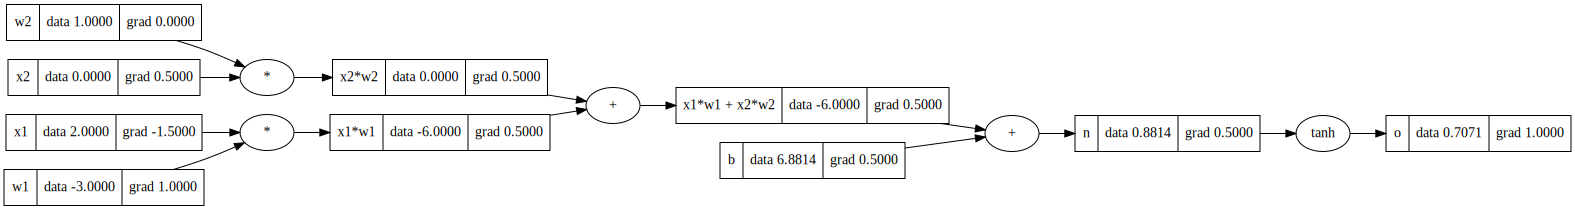

In [61]:
draw_dot(o)

## Onto Automatic backpropagation
Doing backpropagation manually all 
the time is obviously as 
ridiculous as it is tedious, so we
will now implement a more automated
way of performing this backpropagation

**we will add a function that will do 
that bit of chain rule we have been doing
manually up until this point**

To do this we will go back to the Value object, 
and we will now store a backwards property

We will set it to an empty function by default
this will be used in cases such as leaf nodes
where no backpropagation is to be done

In [47]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self._backward = lambda: None

    def __repr__(self) -> str:
        return f"Value(data={self.data})"

    def __add__(self, other) -> str:
        out = Value(self.data + other.data, (self, other), "+")
        # this will be the function that propagates
        # the gradient

        def _backward():
            # chain rule of derivative of additon and out gradient
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other) -> str:
        out = Value(self.data * other.data, (self, other), "*")

        def _backward():
            # chain rule of derivative of additon and out gradient
            self.grad = other.data * out.grad
            other.grad = self.grad * out.grad

        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        # wrap the value in a tuple, and call the function tanh
        out = Value(t, (self,), 'tanh')

        def _backward():
            # chain rule of derivative of additon and out gradient
            self.grad = (1 - t**2) * out.grad

        out._backward = _backward
        return out


So we have redefined our `Value` class
Now if we redefine our expression, we can
use our `backward()` method to perform our
backpropagation

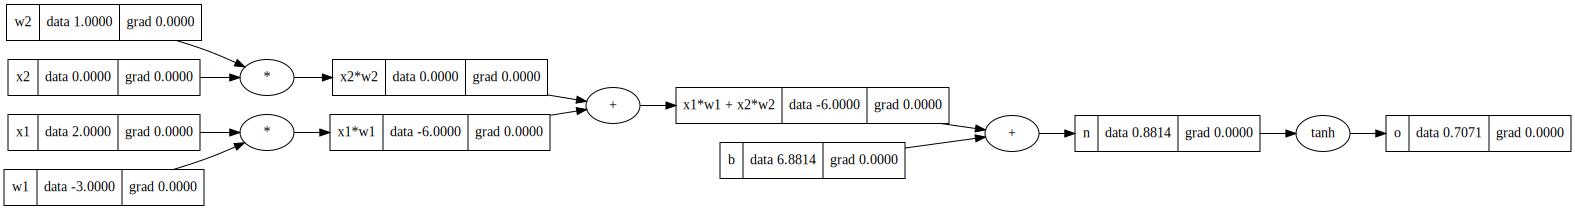

In [48]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the nueron
b = Value(6.8813735870195432, label='b')

# now according to the model above
# we need to multiply, x1 with w1
# and x2 with w2
x1w1 = x1*w1
x1w1.label = 'x1*w1'
x2w2 = x2*w2
x2w2.label = 'x2*w2'

# we do this in small steps so we
# can maintain pointers to each
# in this example
x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1*w1 + x2*w2'

# Finally we need to add the bias
# on top of that
n = x1w1x2w2 + b
n.label = 'n'

# now we can add our tanh
o = n.tanh()
o.label = 'o'
draw_dot(o)


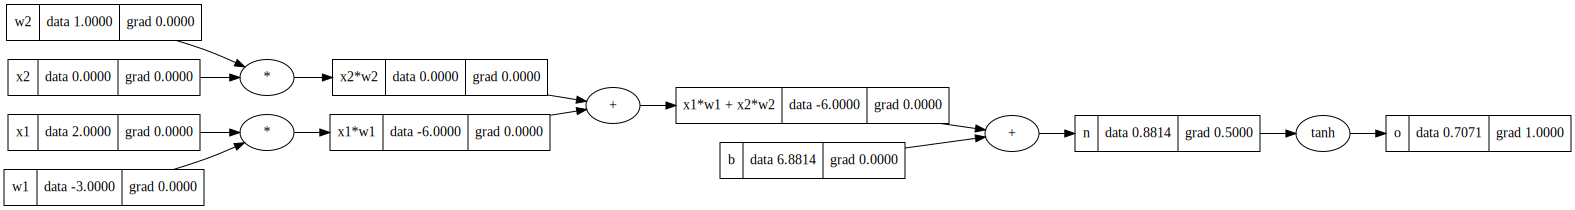

In [49]:
# we must set o.grad to 1.0 
# to initialize our gradients
# to propagate our gradients backwards
o.grad = 1.0
o._backward()
draw_dot(o)

We can see our backward function worked! Woop woop!

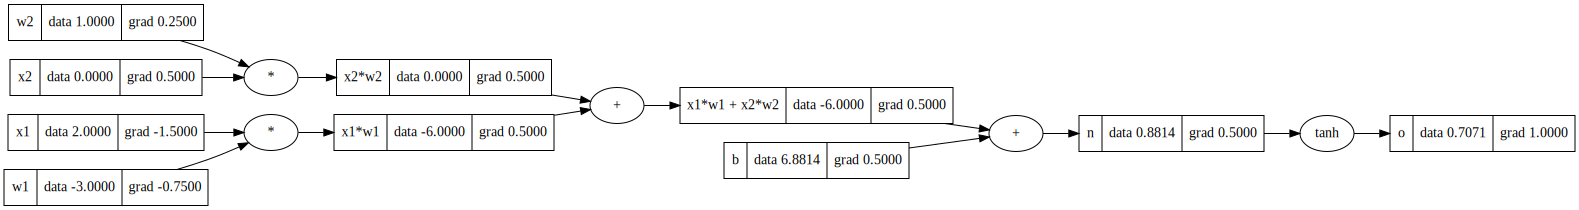

In [50]:
o.grad = 1.0
o._backward()
n._backward()
# this is a leaf node so will do nothing
b._backward()
x1w1x2w2._backward()
x2w2._backward()
x1w1._backward()
draw_dot(o)

Okay now we can see the only thing
left to do is to prevent ourselves
having to call backwards manually
on each node

To go backwardds through the
expression means we never want to
call `._backward()` on any one
node before we have called it on the expressions preceeding it

This ordering of graphs can be 
achieved with something called
**topological sort**

### Topological sort

Here is a description

The code required to build out topological sort is like the following

In [51]:
topo = []
visited = set()


def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)


build_topo(o)
topo


[Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

This builds our graph into a list sorted topilogicaly

Finally we need to put it all together

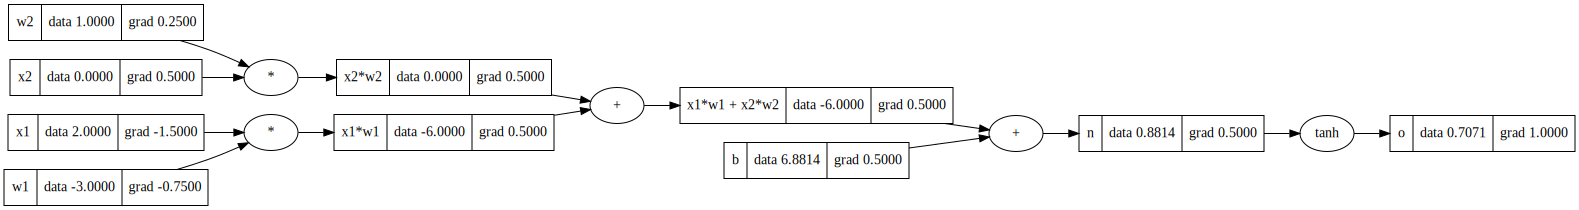

In [52]:
# set the base case
o.grad = 1.0

# then build the topological order 
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)


build_topo(o)
topo

# we need to then go through the list in reversed 
# order and run our backpropagation
for node in reversed(topo):
    node._backward()

# now we can draw the result 
draw_dot(o)